In [189]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Датасет - Music Genre Classification

## Описание задачи  
По приведенным характеристикам определить жанр музыки к которому принадлежит песня.

In [190]:
url_train = r"F:/Downloads/Music Genre/train.csv"

data = pd.read_csv(url_train)

In [191]:
data.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [192]:
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [193]:
data.tail()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.00129,0.916000,0.2560,0.355,131.363,219693.0,4,8
17995,The Raconteurs,Broken Boy Soldier,43.0,0.400,0.853,4.0,-5.320,0,0.0591,0.00604,0.212000,0.3340,0.377,138.102,182227.0,4,10


Столбцы (признаки) имеют имена:

- artist name - имя артиста
- track name - название песни
- popularity - популярность
- danceability - коэффициент "танцевальности"
- energy - энергичность
- key 
- loudness - громкость
- mode
- speechiness -  бессловесность
- acousticness - акустичность
- instrumentalness - инструменатльность
- liveness 
- valence  Описывает музыкальную позитивность
- tempo - темп песни
- duration in -milliseconds  - длительность
- time_signature - размер такта
- Class - класс музыки 

Требуется предсказать категориальный признак Class по остальным признакам. Это задача классификации.
Классы: Rock - 10 , Indie - 6 , Pop - 9, Metal - 8, HipHop - 5, Alt_Music - 1 , Blues - 2 , Acoustic/Folk - 0 , Instrumental-7 , Country - 4 , Bollywood - 3

In [194]:
data['Popularity'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     2.000
0.010     4.000
0.050    16.000
0.100    23.000
0.500    44.000
0.900    68.000
0.950    74.650
0.990    84.000
0.995    87.165
Name: Popularity, dtype: float64

Мы видим, что $99.9\%$ всех значений признака 'Popularity' находится в диапазоне от $2.0$ до $87.165$  (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

Удалим все строки таблицы, в которых 'Popularity' выходят за пределы квантилей $0.005$, $0.995$.

In [195]:
rows_to_drop = data[
    (data['Popularity'] < data['Popularity'].quantile(0.005)) | (data['Popularity'] > data['Popularity'].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(17844, 17)

In [196]:
data_numeric = data.select_dtypes(exclude ='object')

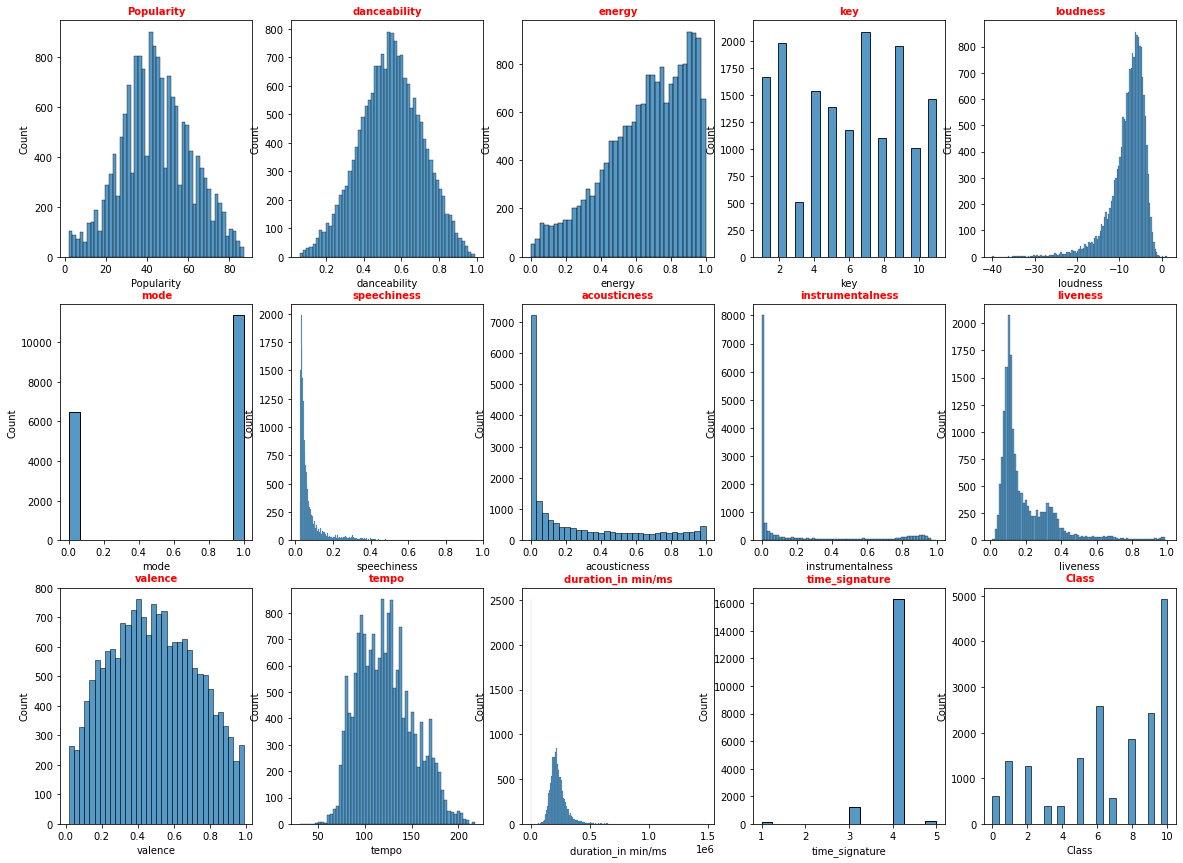

In [197]:
plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(4,5,(i%15)+1)
    sns.histplot(data_numeric[data_numeric.columns[i]])
    plt.title(data_numeric.columns[i],fontdict={'fontsize':10,'fontweight':'bold','color':'red'})

Также избавимся от выбросов по признакам 'danceability' и 'loudness' 

In [198]:
rows_to_drop = data[
    (data['danceability'] < data['danceability'].quantile(0.005)) | (data['danceability'] > data['danceability'].quantile(0.995))|
    (data['loudness'] < data['loudness'].quantile(0.1)) | (data['loudness'] > data['loudness'].quantile(0.92))].index
data = data.drop(rows_to_drop)
data.shape

(14515, 17)

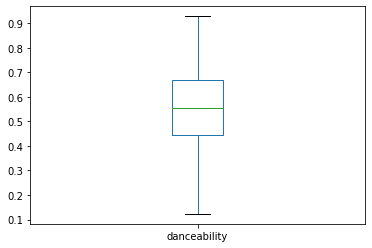

In [199]:
data['danceability'].plot(kind ='box')
plt.show()

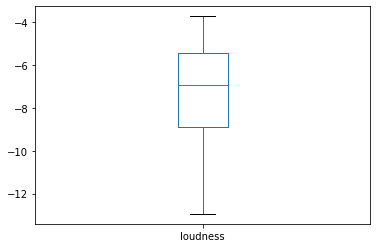

In [200]:
data['loudness'].plot(kind ='box')
plt.show()

# Визуализация и описательная статистика
Получим сводную информацию о количественных признаках. Найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей:

In [201]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14170.000000,14515.000000,14515.000000,12945.000000,14515.000000,14515.000000,14515.000000,14515.000000,10824.000000,14515.000000,14515.000000,14515.000000,1.451500e+04,14515.000000,14515.000000
mean,44.722795,0.552840,0.687750,5.976053,-7.295637,0.635687,0.079004,0.212305,0.148819,0.197415,0.500176,123.147639,2.071716e+05,3.933104,6.686531
std,17.156771,0.159074,0.193286,3.207452,2.275773,0.481254,0.082555,0.273103,0.274976,0.160238,0.234528,29.072091,1.058764e+05,0.341842,3.244585
min,2.000000,0.123000,0.000020,1.000000,-12.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,42.956000,9.691500e-01,1.000000,0.000000
25%,33.000000,0.443000,0.551000,3.000000,-8.906000,0.000000,0.034200,0.004270,0.000074,0.097600,0.317000,99.997000,1.724890e+05,4.000000,5.000000
50%,44.000000,0.554000,0.708000,6.000000,-6.945000,1.000000,0.046800,0.069900,0.002865,0.132000,0.496000,121.010000,2.116300e+05,4.000000,8.000000
75%,57.000000,0.667000,0.849000,9.000000,-5.440500,1.000000,0.081250,0.355000,0.125000,0.258000,0.682500,142.007500,2.541645e+05,4.000000,10.000000
max,87.000000,0.928000,1.000000,11.000000,-3.725000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [202]:
data.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

Проверим датасет на наличие пропущенных значений.

In [203]:
data.isna().sum()

Artist Name              0
Track Name               0
Popularity             345
danceability             0
energy                   0
key                   1570
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3691
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

Как мы видим имеются пропущенные данные. 
Заполняем их медианами

In [204]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

Вычислим матрицу корреляции для количественных признаков:

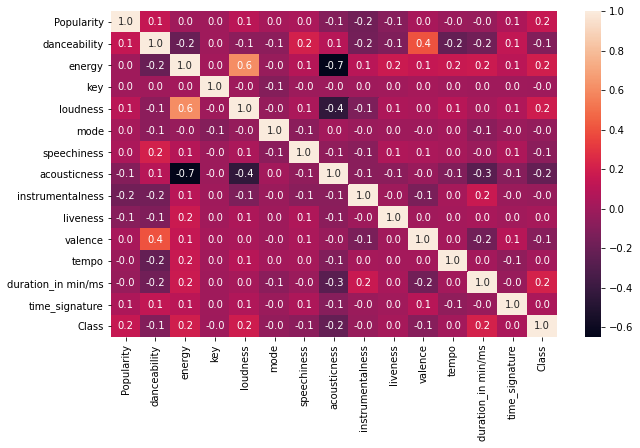

In [205]:
plt.figure(figsize=(10,6))
x=sns.heatmap(data.corr(),annot=True, fmt='0.1f')
plt.show()

In [206]:
y = data["Class"]
data = data.drop(["Class"], axis=1)

# Нормализация количественных признаков

Выполним стандартизацию всех признаков (линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению): 
Выбираем имеено этот вариант нормализации, так как в дальнейшем будем использовать алгоритм k ближайших соседей, основанный на измерении расстояний.

In [207]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data = pd.concat((data_stand,y),axis = 1)

In [208]:
data.describe()

,Popularity,acousticness,danceability,duration_in min/ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Class
count,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,1.451500e+04,14515.000000
mean,-1.254307e-17,-2.709013e-15,-1.570512e-14,1.078222e-15,9.583531e-15,1.719726e-14,-1.887035e-16,5.773925e-16,-4.963014e-15,3.709361e-16,2.608378e-15,5.066327e-15,-2.125712e-15,2.637382e-15,6.686531
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.244585
min,-2.519209e+00,-7.773824e-01,-2.702137e+00,-1.956722e+00,-3.558096e+00,-4.544297e-01,-1.643648e+00,-1.157750e+00,-2.485469e+00,-1.320899e+00,-6.844391e-01,-2.758372e+00,-8.580300e+00,-2.054664e+00,0.000000
25%,-6.905156e-01,-7.617473e-01,-6.904962e-01,-3.275763e-01,-7.075029e-01,-4.533801e-01,-6.532287e-01,-6.229187e-01,-7.076116e-01,-1.320899e+00,-5.427148e-01,-7.963183e-01,1.956939e-01,-7.810414e-01,5.000000
50%,-4.162430e-02,-5.214350e-01,7.291590e-03,4.210958e-02,1.047649e-01,-4.427784e-01,7.050867e-03,-4.082374e-01,1.540738e-01,7.570081e-01,-3.900886e-01,-7.352889e-02,1.956939e-01,-1.780577e-02,8.000000
75%,6.662571e-01,5.224937e-01,7.176521e-01,4.438470e-01,8.342538e-01,-3.205910e-01,9.974703e-01,3.780952e-01,8.151679e-01,7.570081e-01,2.721069e-02,6.487274e-01,1.956939e-01,7.774090e-01,10.000000
max,2.494951e+00,2.869594e+00,2.358396e+00,1.199527e+01,1.615480e+00,3.597461e+00,1.657750e+00,5.008721e+00,1.568978e+00,7.570081e-01,1.061111e+01,3.242572e+00,3.121025e+00,2.071499e+00,10.000000


# Отбор признаков

Для предсказания жанра музыки будедет использовать все признаки кроме Artist Name и Track Name

In [209]:
X = data.drop(['Class',"Artist Name","Track Name"],axis=1)
y = data["Class"]
X = X.to_numpy()
y = y.to_numpy()


Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

10886 3629


# Обучение
Проведем обучение с помощью k-nearest neighbors algorithm (k-NN)

In [211]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100)
knn.set_params(n_neighbors=40)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [212]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != y_train_predict)

In [213]:
err_test,err_train

(0.5263157894736842, 0.49687672239573766)

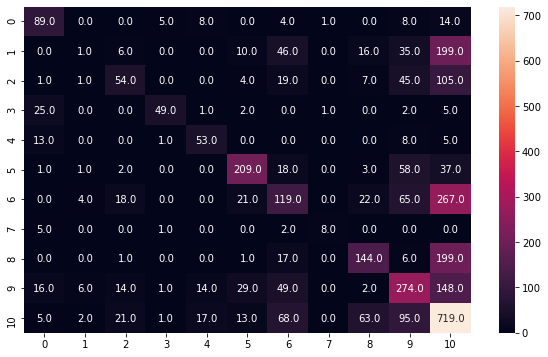

In [214]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,6))
x=sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True, fmt='0.1f')
plt.show()

# Выводы
В ходе данной работы была попутка обучить модель, способную предсказать жанр музыки. Обучение проводилось с помощью метода ближайших k-соседей. Путем подбора оптимальных параметров метода и предварительной обработки данных, был получен процент ошибок на обучающей выборке: 49%, на тестовой выборке: 52%. Можно заметить, что в большинстве случаев при ошибке прогнозирвания, модель относила песню к жанру 'Rock'. Можно предположить,что ошибка связана с несбансированностью классов в сторону категории 'Rock'. К тому же на точность могли повлиять пропущенные значения в таблице. 
Результат можно улучшить применив другой метод обучения модели, а также применить методы устранения несбалансированности классов.